# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The goal is to identify the key factors that influence the prices of used cars to provide insights for a used car dealership. These insights will help the dealership understand what consumers value in a used car, allowing them to make informed decisions about pricing, inventory management, and marketing strategies. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To gain a thorough understanding of the dataset and identify any quality issues, the following steps should be taken:

1. **Initial Data Inspection**
    - **Load the Data**: Load the dataset into a Pandas DataFrame in order to inspect and manipulate the data.
    - **Preview the Data**: Use functions like head(), tail(), and sample() to view a subset of the data and understand it's structure.
    - **Check Data Types**: Use info() to get an overview of the data types of each column and identify any inconsistencies.
    - **Summary Statistics**: Use describe() to generate summary statistics for numerical columns to understand the distribution, central tendency, and dispersion of the data.
    
    
2. **Data Quality Assessment**
    - **Missing Values**: Identify missing values using isnull().sum() and determine their distribution across the dataset.
    - **Duplicate Records**: Check for duplicate records using duplicated() and assess their impact on the dataset. 
    - **Inconsistent Data**: Look for inconsistencies in categorical data (different spellings or formats for the same category)
    - **Outliers**: Identify outliers in numerical data using visualization techniques (box plots) and statistical methods (Z-scores).
    - **Data Range and Validity**: Ensure that numerical values fall within expected ranges and categorical values are valid and consistent.
    
    
3. **Exploratory Data Analysis (EDA)**
    - **Visualize Distributions**: Plot histograms, box plots, and density plots
    - **Examine Relationships**: Use scatter plots, pair plots, and correlation matrices.
    - **Identify Outliers**: Further investigate outliers identified earlier
    - **Summary Statistics**: Revisit summary statistics after initial cleaning
        
        
    
    

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

### 1. Initial Data Inspection

In [32]:
# Loading the data
cars = pd.read_csv('data/vehicles.csv')

In [33]:
# Preview the data
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [34]:
# Display a sample of 5 rows from the cars DataFrame
cars.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
312241,7312135680,bend,11995,2004.0,gmc,yukon xl,excellent,8 cylinders,gas,NaN,clean,automatic,NaN,4wd,NaN,SUV,grey,or
317251,7312102710,eugene,38998,2018.0,gmc,sierra 1500 *4x4 sle *4dr *crew cab 5.8 ft sb ...,NaN,8 cylinders,gas,63840.0,clean,automatic,3GTU2MEC5JG250885,4wd,NaN,pickup,grey,or
317302,7311996951,eugene,16990,2009.0,chevrolet,colorado,NaN,NaN,gas,122189.0,clean,automatic,1GCDT13E498101966,4wd,NaN,pickup,NaN,or
48810,7315941369,reno / tahoe,26984,2018.0,honda,accord,NaN,NaN,other,30844.0,clean,automatic,1HGCV1F52JA238453,fwd,full-size,sedan,red,ca
263631,7316233069,albany,49900,2019.0,ford,e-series chassis,excellent,8 cylinders,gas,14186.0,clean,automatic,1FDWE3F67KDC02754,rwd,full-size,van,white,ny


In [35]:
# Display the last 5 rows in the DataFrame
cars.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [36]:
# Check the data types
cars.info()

# Notes:
# - Convert year to int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [37]:
# Summary statistics of numeric columns
cars.describe()

# Notes: 
# Max value in the price column is: 3,736,929,000 which is excessively high for a car price
# Max value in the odometer column is: 10,000,000 which is also highly unusual

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### 2. Data Quality Assessment

In [38]:
# Identify Missing Values

# Display a count of the number of null values in each column
cars.isnull().sum()

# Notes: Too many missing values in the following columns:
# paint_color
# type
# size
# drive
# VIN
# cylinders
# condition

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [39]:
# Calculate the percentage of missing values for each column
missing_percent = (cars.isnull().mean() * 100).round(2)
print(missing_percent)

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64


#### Observations

**Columns with High Number of Null Values (Columns to be dropped)**
- **size (71.77%)**: Very high percentage of missing values. 
- **cylinders (41.62%)**: High percentage of missing values. 
- **condition (40.79%)**: High percentage of missing values.
- **VIN (37.73%)**: High percentage of missing values. 
- **drive (30.59%)**: High pergentage of missing values.
- **paint_color (30.50%)**: High percentage of missing values.

**Columns with Moderate Number of Null Values (Fill in missing values using imputation techniques)**
- **type (21.75%)**: Moderate percentage of missing values, important feature
- **manufacturer (4.13%)**: Low percentage of missing values, important feature. 
- **model (1.24%)**: Low percentage of missing values, important feature. 
- **odometer (1.03%)**: Low percentage of missing values, important feature.
- **title_status (1.93%)**: Low percentage of missing values, important feature.
- **fuel (0.71%)**: Low percentage of missing values, important feature.
- **transmission (0.60%)**: Low percentage of missing values, important feature.
- **year (0.28%)**: Very low percentage of missing values, important feature. 

In [40]:
# Duplicate records
duplicates_all_columns = cars[cars.duplicated()]

# Print the duplicate records
print(f"Number of duplicate records {duplicates_all_columns}")

# Note: No duplicate rows were found in the dataset

Number of duplicate records Empty DataFrame
Columns: [id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state]
Index: []


In [41]:
# Inconsistent data - manual inspection
categorical_columns = cars.select_dtypes(include=['object']).columns

# Print a list of unique values in each categorical column
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(cars[column].unique())
    print("\n")

Unique values in 'region':
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder

In [42]:
# Identify Outliers & Data Range and Validity

# Print the top 5 highest prices in the cars['price'] column
highest_prices = cars['price'].nlargest(5)
print(highest_prices)

318592    3736928711
356716    3736928711
91576     3024942282
257840    3024942282
37410     3009548743
Name: price, dtype: int64


The presence of such extremely high and unrealistic values in the price column suggest that these entries may be data entry errors or outliers that do not accurately represent the true prices of the cars. In this case, it is reasonable to consider removing these entries to improve the quality of the analysis. 

In [43]:
# Print the top 5 highest values from the odometer column
highest_odometer_readings = cars['odometer'].nlargest(5)
print(highest_odometer_readings)

9218     10000000.0
23100    10000000.0
28738    10000000.0
34717    10000000.0
44280    10000000.0
Name: odometer, dtype: float64


An odometer reading of 10 000 000 is highly unrealistic. I will set a more reasonable threshold of 400 000 miles to ensure exclusion of unrealistic values while retaining most of the valid data.

### Handling outliers in the price and odometer columns

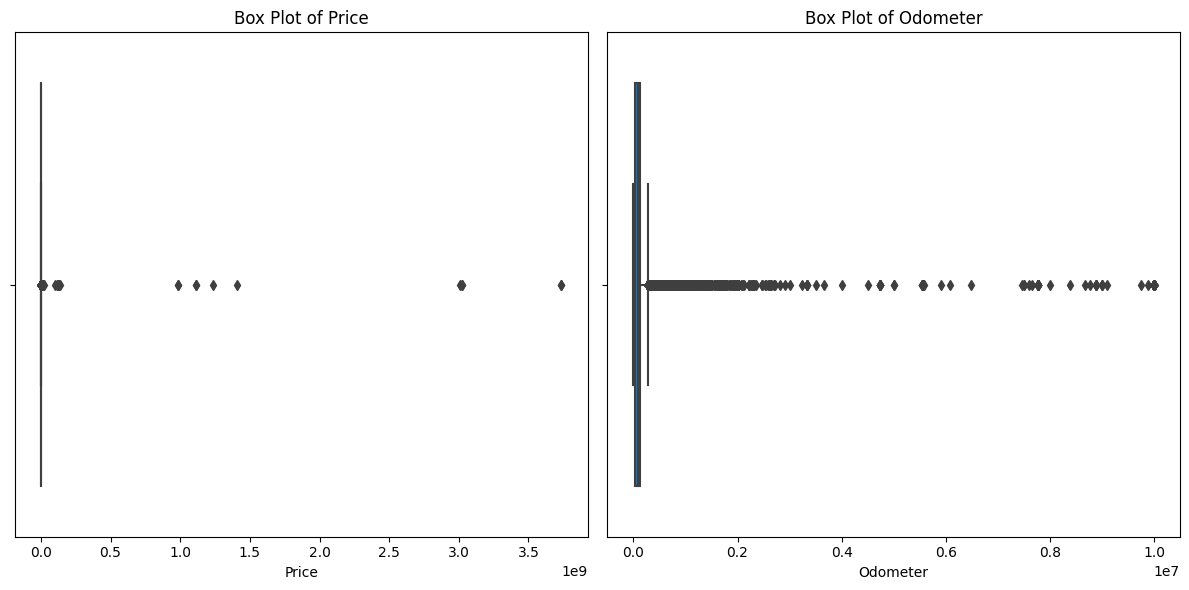

In [44]:
# Create Box Plots to identfy outliers
plt.figure(figsize=(12, 6))

# Box plot for Price
plt.subplot(1, 2, 1)
sns.boxplot(x='price', data=cars)
plt.title('Box Plot of Price')
plt.xlabel('Price')

# Box plot for Odometer
plt.subplot(1, 2, 2)
sns.boxplot(x='odometer', data=cars)
plt.title('Box Plot of Odometer')
plt.xlabel('Odometer')

# Display the plots
plt.tight_layout()
plt.show()


In [45]:
# Count the number of cars with an odometer reading 400,000 or greater or price greater than 500,000
num_high_odometer_cars = (cars['odometer'] > 400_000).sum()
num_high_price_cars = (cars['price'] > 500_000).sum()

print(f"Number of cars with an odometer reading greater than 400,000: {num_high_odometer_cars}")
print(f"Number of cars with a price greater than 500,000: {num_high_price_cars}")

Number of cars with an odometer reading greater than 400,000: 1702
Number of cars with a price greater than 500,000: 68


### 3. Exploratory Data Analysis (EDA)

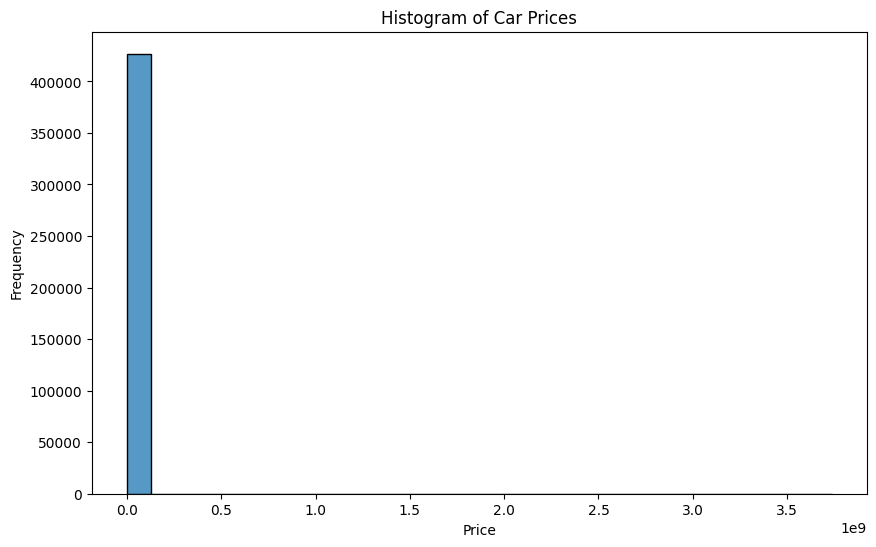

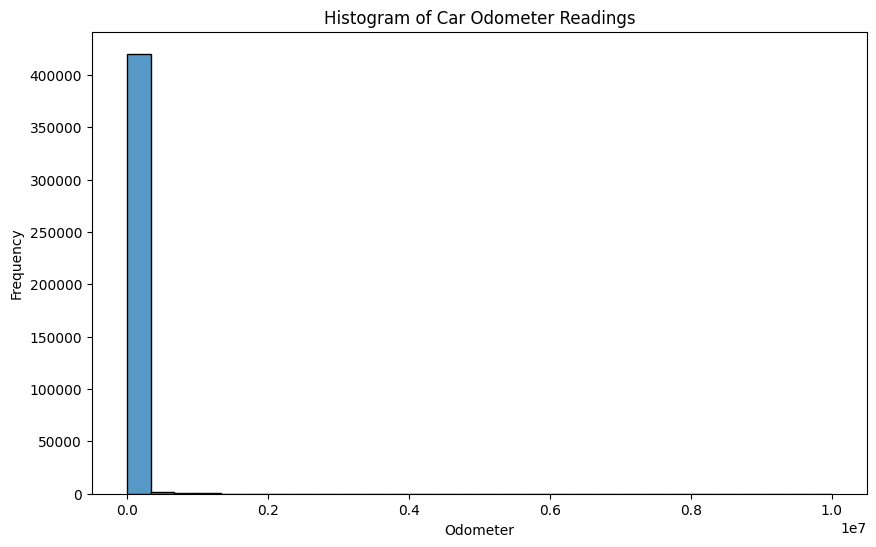

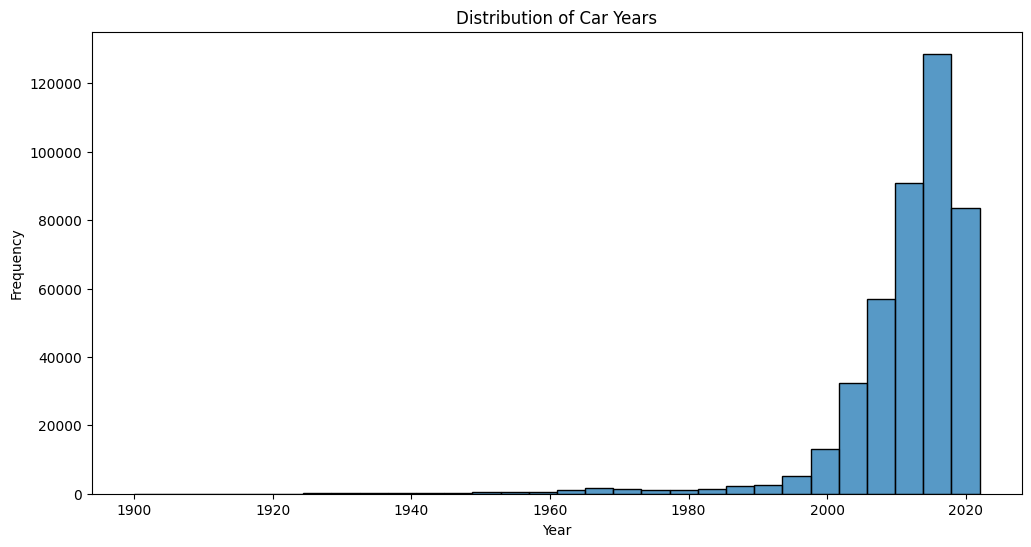

In [46]:
# Plot histogram for the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(cars['price'], bins=30)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for the 'odometer' column
plt.figure(figsize=(10, 6))
sns.histplot(cars['odometer'], bins=30)
plt.title('Histogram of Car Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

# Plot the histogram for the 'year' column
plt.figure(figsize=(12, 6))
sns.histplot(cars['year'], bins=30)
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

The majority of the data points for the price and odometer columns are concentrated in a very small range of values, with very few data points spread across a wider range, and this makes it difficult to visualize and analyze the data effectively. To address this there are a few options:


1. **Log Transformation**:
    - Log transformation is commonly used to handle skewed data. It compresses the range ov values and can make the data distribution more uniform. 
    
    
2. **Normalization/Scaling**:
    - Normalization scales the data to a range of [0,1], which can help reducing skewness but may not be as effective as log transformation for highly skewed data.
    

3. **Removing Outliers**: 
    - Removing extreme outliers can help in making the histogram more interpretable.

In [ ]:
# Pair plot to examine relationships

# Select relevant numerical columns
numerical_columns = ['price', 'year', 'odometer']

# Sample the data to reduce computational load (use 2% of the rows)
sampled_cars = cars.sample(frac=0.02, random_state=1)  # Adjust the fraction as needed

# Create a pair plot
sns.pairplot(sampled_cars[numerical_columns])
plt.suptitle('Pair Plot of Selected Numerical Columns in Cars DataFrame (Sampled)', y=1.02)
plt.show()

In addition to the price and odometer columns, the year column also exhibits skewness. Although the year column ranges from 1900 to 2022, the majority of the cars were sold between 1980 and 2022. This skewness is reflected in the distribution of the year column, where there is a significant concentration of more recent cars. This skewness impacts the pair plots by creating an imbalance in visualization, with most data points clustered in a specific range. 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Steps in the Data Preparation Phase:

1. **Handling Integrity Issues and Cleaning**:
    - Impute or remove missing values to ensure there are no gaps in the data.
    
   
2. **Remove or Handle Outliers**: 
    - Based on the initial exploration, some outliers will be removed while others will be transformed. 
    

3. **Feature Engineering**:
    - Create new features and transform existing ones.
    
    
4. **Encoding Categorical Variables**:
    - Convert categorical variables into numerical format.
    
    
5. **Scaling and Normalization**:
    - Standardize or normalize numerical features.
    

6. **Split Data into Training and Testing Sets**:
    - Split the data into training and testing sets.

### Handling Integrity Issues and Cleaning

In [47]:
# Drop columns with very high missing values

# Columns to drop based on high percentage of missing values
columns_to_drop = ['size', 'cylinders', 'condition', 'VIN', 'drive', 'paint_color']

# Drop the identified columns
cars = cars.drop(columns=columns_to_drop)

# Verify the changes
print((cars.isnull().sum() / len(cars) * 100).round(2))

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
type            21.75
state            0.00
dtype: float64


In [48]:
# Impute missing values for remaining columns

# Fill missing values in numerical columns with the median
numerical_cols = cars.select_dtypes(include=['float64', 'int64']).columns
cars[numerical_cols] = cars[numerical_cols].fillna(cars[numerical_cols].median())

# Fill missing values in categorical columns with the mode
categorical_cols = cars.select_dtypes(include=['object']).columns
cars[categorical_cols] = cars[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify the changes
print(cars.isnull().sum())

id              0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64


In [49]:
# Convert the 'year' column to integers
cars['year'] = cars['year'].astype('int64')  # Using 'Int64' to handle potential NaNs

# Verify the changes
print(cars['year'].dtype)
print(cars['year'].head())

int64
0    2013
1    2013
2    2013
3    2013
4    2013
Name: year, dtype: int64


### Remove or Handle Outliers

In [50]:
# Remove the rows where the odometer reading is greater than 400 000
# or the price is greater than 500 000

# Remove cars with an odometer reading greater than 400 000 or price greater than 500,000
cars = cars[(cars['odometer'] <= 400_000) & (cars['price'] <= 500_000)]

# Verify the changes by printing the 10 highest prices and odometer readings after filtering
highest_filtered_prices = cars['price'].nlargest(10)
highest_filtered_odometer = cars['odometer'].nlargest(10)

print("10 Highest Prices after filtering:")
print(highest_filtered_prices)

print("10 Highest Odometer Readings after filtering:")
print(highest_filtered_odometer)

# Check the cleaned data info
print(cars.info())

10 Highest Prices after filtering:
113357    470000
360604    449500
133497    425000
328193    400123
45428     349999
44387     347999
88588     304995
90274     304995
399462    304995
176115    299991
Name: price, dtype: int64
10 Highest Odometer Readings after filtering:
4359      400000.0
9059      400000.0
37547     400000.0
41759     400000.0
72499     400000.0
102600    400000.0
111793    400000.0
115989    400000.0
132939    400000.0
171550    400000.0
Name: odometer, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 425115 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            425115 non-null  int64  
 1   region        425115 non-null  object 
 2   price         425115 non-null  int64  
 3   year          425115 non-null  int64  
 4   manufacturer  425115 non-null  object 
 5   model         425115 non-null  object 
 6   fuel          425115 non-null  object 


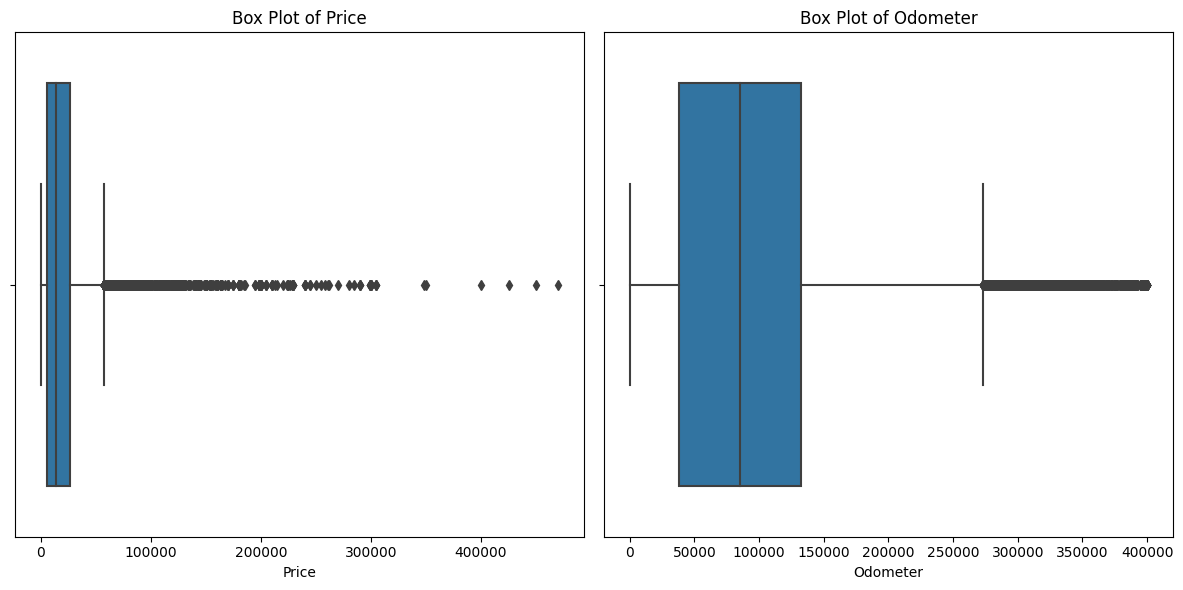

In [51]:
# Create Box Plots to identfy remaining outliers
plt.figure(figsize=(12, 6))

# Box plot for Price
plt.subplot(1, 2, 1)
sns.boxplot(x='price', data=cars)
plt.title('Box Plot of Price')
plt.xlabel('Price')

# Box plot for Odometer
plt.subplot(1, 2, 2)
sns.boxplot(x='odometer', data=cars)
plt.title('Box Plot of Odometer')
plt.xlabel('Odometer')

# Display the plots
plt.tight_layout()
plt.show()

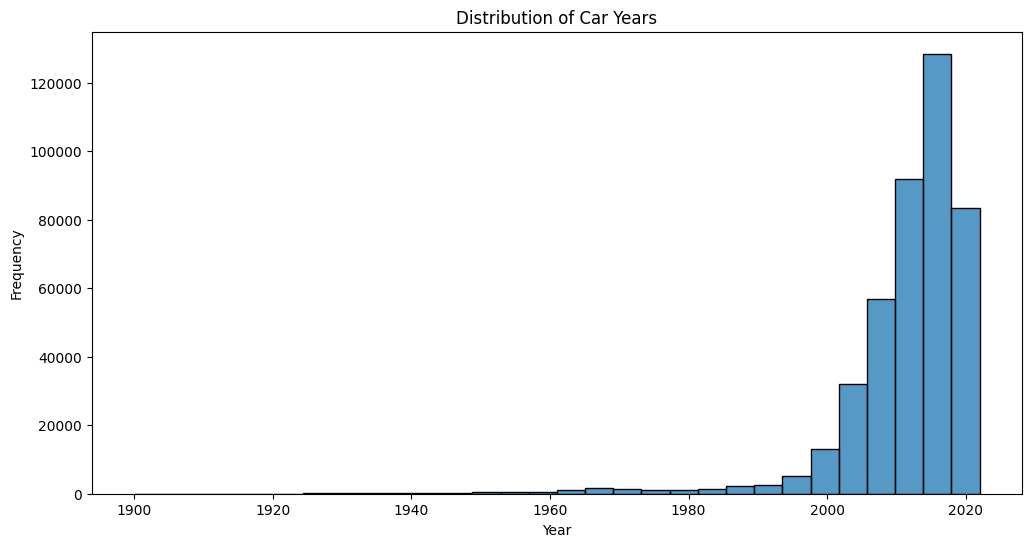

In [66]:
# Plot the histogram for the 'year' column
plt.figure(figsize=(12, 6))
sns.histplot(cars['year'], bins=30)
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [74]:
# Total number of rows
total_rows = len(cars)

# Number of rows with year before 1960
rows_before_1960 = len(cars[cars['year'] < 1990])

# Calculate the percentage
percentage_before_1960 = (rows_before_1960 / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Rows before 1990: {rows_before_1960}")
print(f"Percentage of rows before 1990: {percentage_before_1960:.2f}%")

Total rows: 425115
Rows before 1990: 12015
Percentage of rows before 1990: 2.83%


### Feature Engineering

In [52]:
# Add a column called 'car_age' and calculate the age of the car from the year column
current_year = 2024
cars['car_age'] = current_year - cars['year']

In [53]:
# Create a feature that indicates the price per mile driven
cars['price_per_mile'] = cars['price'] / cars['odometer']

In [54]:
# Categorize cars based on their odometer readings: low, medium, high mileage
def mileage_category(odometer):
    if odometer < 20000:
        return 'low'
    elif odometer < 100000:
        return 'medium'
    else:
        return 'high'

cars['mileage_category'] = cars['odometer'].apply(mileage_category)

### Encoding Categorical Variables

In [55]:
# Display the columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425115 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                425115 non-null  int64  
 1   region            425115 non-null  object 
 2   price             425115 non-null  int64  
 3   year              425115 non-null  int64  
 4   manufacturer      425115 non-null  object 
 5   model             425115 non-null  object 
 6   fuel              425115 non-null  object 
 7   odometer          425115 non-null  float64
 8   title_status      425115 non-null  object 
 9   transmission      425115 non-null  object 
 10  type              425115 non-null  object 
 11  state             425115 non-null  object 
 12  car_age           425115 non-null  int64  
 13  price_per_mile    424264 non-null  float64
 14  mileage_category  425115 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 68.0+ MB


In [56]:
# Print unique values for each column
for column in cars.columns:
    unique_values = cars[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: id
Unique Values: [7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]

Column: region
Unique Values: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area

In [57]:
# Count the number of unique values in each column
unique_counts = cars.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
id                  425115
region                 404
price                15608
year                   112
manufacturer            42
model                29304
fuel                     5
odometer            104220
title_status             6
transmission             3
type                    13
state                   51
car_age                112
price_per_mile      176581
mileage_category         3
dtype: int64


In [58]:
# Determine which columns are good candidates for one-hot encoding
one_hot_candidates = unique_counts[unique_counts < 20].index  # Threshold of 20 unique values for example
print("Columns suitable for one-hot encoding:")
print(one_hot_candidates)

Columns suitable for one-hot encoding:
Index(['fuel', 'title_status', 'transmission', 'type', 'mileage_category'], dtype='object')


The columns suitable for one-hot encoding are **fuel**, **title_status**, **transmission**, **type**, and **mileage_category**. These columns have less than 20 unique values. The one-hot encoding procedure will be done in the Data Preparation stage.

In [59]:
# One-hot encode specified categorical variables
categorical_columns = ['fuel', 'title_status', 'transmission', 'type', 'mileage_category']
cars = pd.get_dummies(cars, columns=categorical_columns, drop_first=True)

# Convert boolean values to integers (0 and 1)
cars = cars.applymap(lambda x: 1 if x is True else (0 if x is False else x))


# Drop only columns that are redundant or less useful
cars = cars.drop(columns=['id'])

# Display the first few rows of the modified DataFrame
cars.head()

,region,price,year,manufacturer,model,odometer,state,car_age,price_per_mile,fuel_electric,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,mileage_category_low,mileage_category_medium
0,prescott,6000,2013,ford,f-150,85548.0,az,11,0.070136,0,...,0,0,0,0,1,0,0,0,0,1
1,fayetteville,11900,2013,ford,f-150,85548.0,ar,11,0.139103,0,...,0,0,0,0,1,0,0,0,0,1
2,florida keys,21000,2013,ford,f-150,85548.0,fl,11,0.245476,0,...,0,0,0,0,1,0,0,0,0,1
3,worcester / central MA,1500,2013,ford,f-150,85548.0,ma,11,0.017534,0,...,0,0,0,0,1,0,0,0,0,1
4,greensboro,4900,2013,ford,f-150,85548.0,nc,11,0.057278,0,...,0,0,0,0,1,0,0,0,0,1


### Scaling and Normalization

In [60]:
# Apply log transformation to the odometer and price columns
cars['log_odometer'] = np.log1p(cars['odometer'])
cars['log_price'] = np.log1p(cars['price'])

# Verify the transformation
print(cars[['odometer', 'log_odometer', 'price', 'log_price']].head())

#Drop the original columns if the log-transformed versions will be used exclusively
cars.drop(columns=['odometer', 'price'], inplace=True)

   odometer  log_odometer  price  log_price
0   85548.0     11.356845   6000   8.699681
1   85548.0     11.356845  11900   9.384378
2   85548.0     11.356845  21000   9.952325
3   85548.0     11.356845   1500   7.313887
4   85548.0     11.356845   4900   8.497195


In [62]:
cars.sample(5)

,region,year,manufacturer,model,state,car_age,price_per_mile,fuel_electric,fuel_gas,fuel_hybrid,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,mileage_category_low,mileage_category_medium,log_odometer,log_price
417036,green bay,2015,chevrolet,traverse ltz awd,wi,9,0.197192,0,1,0,...,0,0,1,0,0,0,0,1,11.459493,9.835958
408446,seattle-tacoma,2017,mercedes-benz,gle 550e 4matic,wa,7,0.664864,0,0,1,...,0,0,0,0,0,0,0,1,10.926837,10.518673
236096,fayetteville,2004,ford,f-450sd,nc,20,0.330024,0,1,0,...,0,0,0,1,0,0,0,1,10.581166,9.472628
24280,chico,2015,mercedes-benz,benz c300,ca,9,0.481184,0,1,0,...,0,0,1,0,0,0,0,1,10.729416,9.997934
161514,omaha / council bluffs,2015,dodge,challenger,ia,9,0.411732,0,1,0,...,0,0,0,0,0,0,0,1,11.162275,10.274913


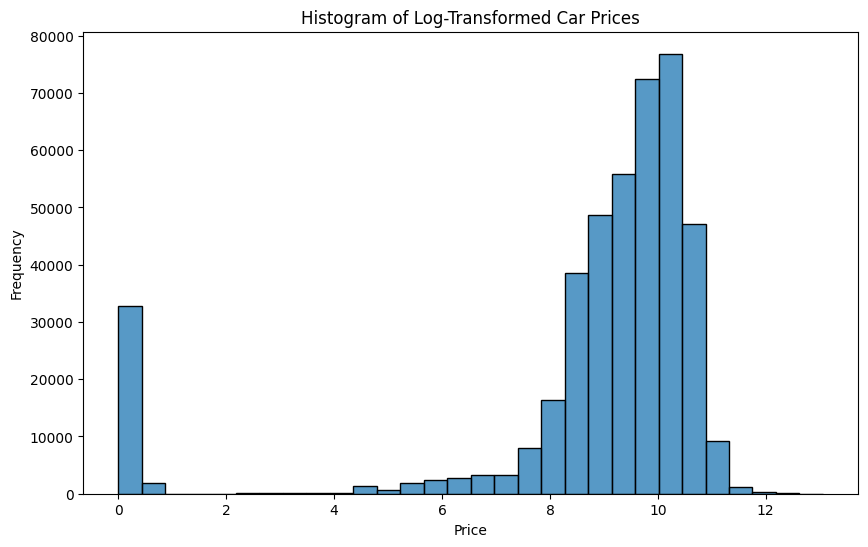

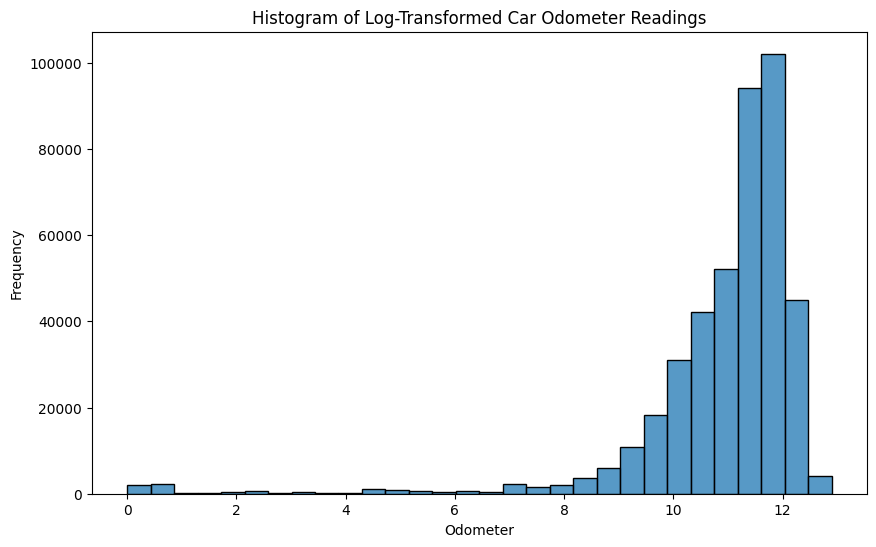

In [64]:
# Plot histogram for the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(cars['log_price'], bins=30)
plt.title('Histogram of Log-Transformed Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for the 'odometer' column
plt.figure(figsize=(10, 6))
sns.histplot(cars['log_odometer'], bins=30)
plt.title('Histogram of Log-Transformed Car Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

The log transformation has helped to normalize the distribution to some extent, but there are still significant peaks which indicate there are cluster of values. 

**Price Distribution**
    - A significant number of cars have lower prices
    - There is a considerable spread in the mid range log prices. 
    - High-end prices are less frequent
    
**Odometer Distribution**
    - Many cars have higher mileage and this is expected in a used car dataset
    - Most cars are in the mid to high odometer range

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.